In [3]:
import numpy as np
from pathlib import Path
import pickle

files = Path('/mnt/d/Documents/brain-scorer/scripts/delay/').glob('*_motionless_h1.pkl')

results = np.zeros((500, 30))

base = 0

for filename in files:
    with open(str(filename), 'rb') as f:
        data = pickle.load(f)
    
    idx = slice(base, base + len(data[0]['corrs_report']))
    for d in data:
        for j in range(30):
            results[idx, j] = data[j]['corrs_report']
                
    base += len(data[0]['corrs_report'])
    
results

array([[0.09442788, 0.09521876, 0.09451698, ..., 0.07169014, 0.07003927,
        0.06901901],
       [0.07189646, 0.07052081, 0.06939478, ..., 0.04555179, 0.04519298,
        0.04439769],
       [0.12845951, 0.12735921, 0.12605006, ..., 0.12796518, 0.12754419,
        0.12769416],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

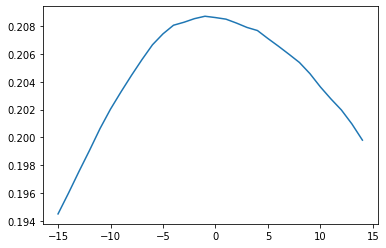

In [4]:
import matplotlib.pyplot as plt
validx = results.mean(axis=1) > 0.05
plt.plot(np.arange(-15, 15), results[validx, :].mean(axis=0))
#plt.vlines(0, .19, .23)

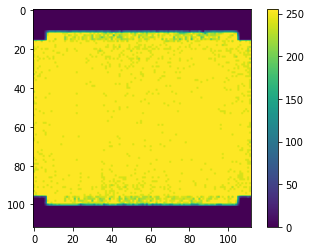

In [5]:
import tables

f = tables.open_file('/mnt/e/data_derived/packlab-dorsal/slu020.h5')
plt.imshow(f.get_node('/X_traintune')[:].max(axis=0))
plt.colorbar()

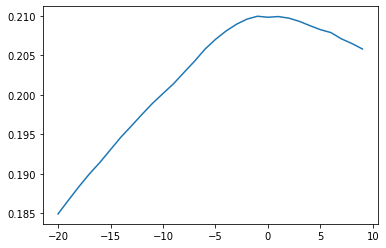

In [6]:
import matplotlib.pyplot as plt
validx = results.mean(axis=1) > 0.05
plt.plot(np.arange(-20, 10), results[validx, :].mean(axis=0))
#plt.vlines(0, .19, .23)